### ZINDI AIR QUALITY PREDICTION CHALLENGE ###

### OKWUAZU IFEAKACHUKWU ###

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from math import sqrt
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('C:\\Users\\Okwua\\Train_AQI.csv')

In [3]:
data

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,02/01/2020,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,03/01/2020,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226563,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,04/01/2020,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,05/01/2020,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,06/01/2020,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,15/03/2020,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,16/03/2020,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,17/03/2020,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,18/03/2020,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DATA EXPLORATION ###

In [4]:
print(data.shape)

print('.......................................................')

print(data.isna().sum())

(30557, 82)
.......................................................
Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64


In [5]:
def drop_cols_na(data, threshold):
  """Recieves dataframe(df) and threshold as arguements and drops columns based on the threshold percentage of NANs"""
  threshold= len(data) * 0.8 #specifying threshold percentage 
  data=data.dropna(axis=1, thresh=threshold)  #dropping columns with 50% NANs
  return data

In [6]:
#calling the function
data = drop_cols_na(data,0.8)
data.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle
0,010Q650 X 2020-01-02,02/01/2020,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.8746,76.537512,38.634284,-61.736719,22.358167
1,010Q650 X 2020-01-03,03/01/2020,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.9420,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,04/01/2020,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,0.307463,-1.001241,841410.7135,-105.201338,49.839714,-78.342701,34.296977
3,010Q650 X 2020-01-05,05/01/2020,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,0.279637,-0.777023,841103.2424,-104.334056,29.180977,-73.896572,30.545393
4,010Q650 X 2020-01-06,06/01/2020,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,0.238241,0.366324,840763.0555,58.850179,0.797294,-68.612480,26.899694


In [7]:
data.drop(['Place_ID X Date','Place_ID','target_min','target_max','target_variance','target_count'], axis=1, inplace=True)

data.shape

(30557, 51)

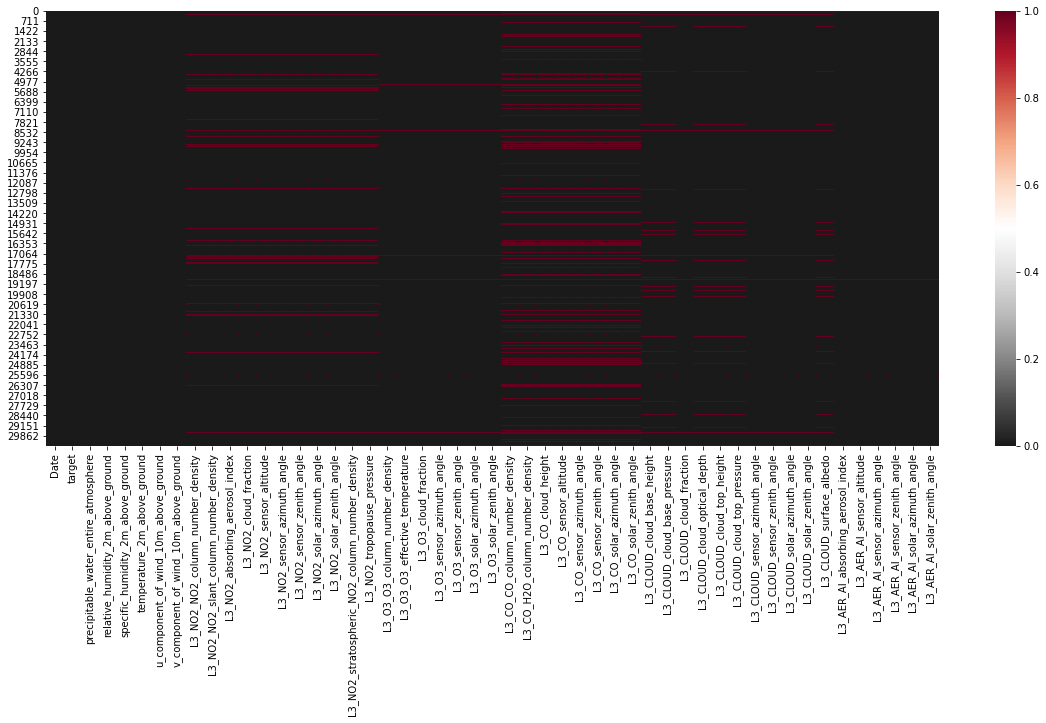

In [8]:
plt.figure(figsize=(20,8)) #specifying figure size 
sns.heatmap(data.isnull(), cbar=True,cmap='RdGy_r');


In [9]:
data.isna().sum()

Date                                                 0
target                                               0
precipitable_water_entire_atmosphere                 0
relative_humidity_2m_above_ground                    0
specific_humidity_2m_above_ground                    0
temperature_2m_above_ground                          0
u_component_of_wind_10m_above_ground                 0
v_component_of_wind_10m_above_ground                 0
L3_NO2_NO2_column_number_density                  2189
L3_NO2_NO2_slant_column_number_density            2189
L3_NO2_absorbing_aerosol_index                    2189
L3_NO2_cloud_fraction                             2189
L3_NO2_sensor_altitude                            2189
L3_NO2_sensor_azimuth_angle                       2190
L3_NO2_sensor_zenith_angle                        2190
L3_NO2_solar_azimuth_angle                        2190
L3_NO2_solar_zenith_angle                         2190
L3_NO2_stratospheric_NO2_column_number_density    2190
L3_NO2_tro

In [10]:
#for column in data.select_dtypes(exclude = ['object']).columns:
    #plt.figure()             
    #sns.distplot(data[column])

In [11]:
data.fillna(data.median(), inplace=True)

In [12]:
print(data.isna().sum().sum())
print(data.duplicated().sum())

0
0


In [13]:
data['Date']= pd.to_datetime(data['Date'], dayfirst=True)

#
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day


data.drop(['Date'],axis=1, inplace=True)

In [14]:
# move tagret column to last position 
new_cols = [col for col in data.columns if col != 'target'] + ['target']
data= data[new_cols]
data

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,year,Month,Day,target
0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,...,-1.231330,840209.87460,76.537512,38.634284,-61.736719,22.358167,2020,1,2,38.0
1,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,...,-1.082553,840772.94200,-14.708036,59.624912,-67.693509,28.614804,2020,1,3,39.0
2,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,...,-1.001241,841410.71350,-105.201338,49.839714,-78.342701,34.296977,2020,1,4,24.0
3,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,...,-0.777023,841103.24240,-104.334056,29.180977,-73.896572,30.545393,2020,1,5,49.0
4,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,0.028530,...,0.366324,840763.05550,58.850179,0.797294,-68.612480,26.899694,2020,1,6,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,-1.412609,0.001107,...,-1.412609,833637.57570,-16.856890,54.302954,12.312248,49.871571,2020,3,15,22.0
30553,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,-1.449760,0.004726,...,-1.448509,833894.34270,-23.953088,49.391952,1.301716,49.012079,2020,3,16,53.0
30554,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,0.000068,0.000135,-1.722480,0.026249,...,-1.722478,833286.23020,-103.669725,8.955216,-162.856069,48.459205,2020,3,17,85.0
30555,19.100000,66.300003,0.00523,10.573236,0.434940,-1.439778,0.000086,0.000148,-2.065102,0.144318,...,-2.042785,833480.95970,71.094890,17.981050,-168.907480,47.292238,2020,3,18,103.0


In [15]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
#plot graph of feature importances for better visualization
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances=feat_importances.nlargest(20).keys().to_list()
feat_importances

['L3_CO_CO_column_number_density',
 'L3_AER_AI_sensor_altitude',
 'L3_NO2_NO2_slant_column_number_density',
 'temperature_2m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'specific_humidity_2m_above_ground',
 'L3_CLOUD_surface_albedo',
 'relative_humidity_2m_above_ground',
 'Month',
 'L3_NO2_tropopause_pressure',
 'precipitable_water_entire_atmosphere',
 'L3_CO_sensor_altitude',
 'L3_O3_O3_effective_temperature',
 'L3_O3_O3_column_number_density',
 'L3_CLOUD_cloud_optical_depth',
 'L3_NO2_sensor_altitude',
 'L3_AER_AI_absorbing_aerosol_index',
 'Day']

In [18]:
for item in feat_importances:
    mydata_new =data[feat_importances]
mydata_new

,L3_CO_CO_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_slant_column_number_density,temperature_2m_above_ground,L3_NO2_NO2_column_number_density,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,specific_humidity_2m_above_ground,L3_CLOUD_surface_albedo,relative_humidity_2m_above_ground,Month,L3_NO2_tropopause_pressure,precipitable_water_entire_atmosphere,L3_CO_sensor_altitude,L3_O3_O3_effective_temperature,L3_O3_O3_column_number_density,L3_CLOUD_cloud_optical_depth,L3_NO2_sensor_altitude,L3_AER_AI_absorbing_aerosol_index,Day
0,0.021080,840209.87460,0.000156,18.516840,0.000074,1.996377,-1.227395,0.00804,0.210020,60.200001,1,6156.074219,11.000000,840138.4611,234.151102,0.119095,8.520578,840209.8746,-1.231330,2
1,0.022017,840772.94200,0.000197,22.546533,0.000076,3.330430,-1.188108,0.00839,0.315403,48.799999,1,6156.074219,14.600000,841116.7631,233.313706,0.115179,5.958538,840772.9420,-1.082553,3
2,0.020677,841410.71350,0.000170,27.031030,0.000067,5.065727,3.500559,0.00750,0.307463,33.400002,1,7311.869141,16.400000,841319.8604,232.233484,0.115876,5.755760,841410.7135,-1.001241,4
3,0.021207,841103.24240,0.000175,23.971857,0.000083,3.004001,1.099468,0.00391,0.279637,21.300001,1,11205.388330,6.911948,841036.1929,230.936229,0.141557,6.246885,841103.2424,-0.777023,5
4,0.037766,840763.05550,0.000142,16.816309,0.000070,2.621787,2.670559,0.00535,0.238241,44.700001,1,11205.372840,13.900001,840710.3422,232.499132,0.126369,4.205691,840763.0555,0.366324,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,0.039941,833637.57570,0.000165,4.256799,0.000063,-4.810586,-4.195359,0.00352,0.243682,68.300003,3,22073.788220,6.700000,833666.8503,227.627879,0.174995,5.875377,833637.5757,-1.412609,15
30553,0.037872,833894.34270,0.000161,2.067438,0.000072,-2.346421,0.749136,0.00341,0.156944,77.700005,3,16689.048840,6.300000,833169.2513,227.196630,0.157659,5.068010,833603.0156,-1.448509,16
30554,0.038539,833286.23020,0.000135,4.438623,0.000068,0.095703,0.141943,0.00356,0.211473,68.500000,3,19245.841950,7.100000,833315.1486,227.328975,0.168295,10.443789,833286.2302,-1.722478,17
30555,0.038757,833480.95970,0.000148,10.573236,0.000086,0.434940,-1.439778,0.00523,0.221439,66.300003,3,16689.689380,19.100000,833509.6852,226.085016,0.160637,9.744343,833480.9336,-2.042785,18


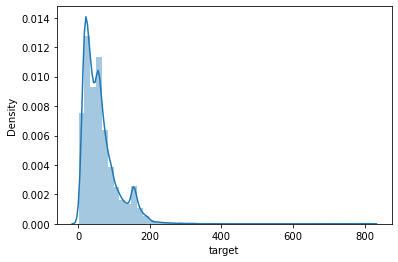

In [19]:
sns.distplot(y);

In [20]:
# scaling independent variables to fall between 0 and 1(similar to the dependent feature) to prevent favoritism/bias during modelling
scaler_x=MinMaxScaler()
X_scaled=scaler_x.fit(mydata_new)
X_scaled=scaler_x.transform(mydata_new)
X_scaled

array([[0.07230756, 0.72775424, 0.0640916 , ..., 0.99492711, 0.31118736,
        0.03333333],
       [0.07551959, 0.76353666, 0.08097456, ..., 0.99559386, 0.328109  ,
        0.06666667],
       [0.07092344, 0.80406646, 0.07009602, ..., 0.99634907, 0.33735721,
        0.1       ],
       ...,
       [0.13219271, 0.28776296, 0.05553536, ..., 0.98672854, 0.2553252 ,
        0.53333333],
       [0.13294007, 0.30013784, 0.06101823, ..., 0.9869591 , 0.21889411,
        0.56666667],
       [0.12198463, 0.20935676, 0.07716329, ..., 0.98688611, 0.31711159,
        0.6       ]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

### MODELLING ###

In [22]:
# define model
model =  RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
y_pred=model.predict(X_test)

In [24]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, y_pred),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, y_pred),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, y_pred)),2)))
print('R_squared:'+ str(round(r2_score(y_test,y_pred),2)))

MAE: 20.17
MSE: 962.02
RMSE:31.02
R_squared:0.58


### HYPERPARAMETER OPTIMISATION ##

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [28]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [30]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=  11.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=  11.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=  12.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=  11.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=  11.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  48.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  50.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.6s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=  51.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=  51.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=  51.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=  50.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  36.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time= 3.9min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time= 3.7min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time= 3.7min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time= 3.8min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time= 3.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=  18.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=  18.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=  20.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=  49.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=  48.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=  40.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=  40.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=  41.3s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=  18.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=  19.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=  19.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=  19.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=  20.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=  26.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=  28.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=  26.9s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time= 1.1min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time= 1.2min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time= 4.8min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time= 5.0min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=13.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time= 5.4min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=12.5min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=  46.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=  43.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=  44.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=  45.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  51.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  48.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  48.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  49.0s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [59]:
predictions=rf_random.predict(X_test)

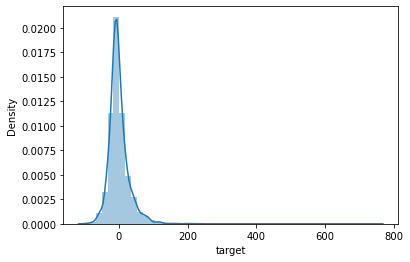

In [60]:
sns.distplot(y_test-predictions);

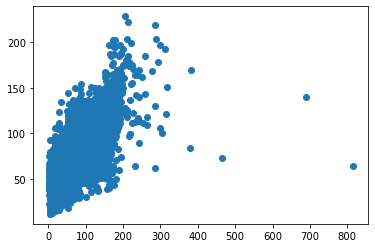

In [61]:
plt.scatter(y_test,predictions);

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.21834549671691
MSE: 974.7168432093888
RMSE: 31.22045552533449


### TESTING THE MODEL ###

In [73]:
Test= pd.read_csv('C:\\Users\\Okwua\\Test_AQI.csv')
sub= pd.read_csv('C:\\Users\\Okwua\\SampleSubmission.csv')


In [74]:
Test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [75]:
print(Test.shape)
print(Test.isna().sum())

(16136, 77)
Place_ID X Date                             0
Date                                        0
Place_ID                                    0
precipitable_water_entire_atmosphere        0
relative_humidity_2m_above_ground           0
                                        ...  
L3_CH4_aerosol_optical_depth            13021
L3_CH4_sensor_azimuth_angle             13021
L3_CH4_sensor_zenith_angle              13021
L3_CH4_solar_azimuth_angle              13021
L3_CH4_solar_zenith_angle               13021
Length: 77, dtype: int64


In [76]:
Test['Date']= pd.to_datetime(Test['Date'], dayfirst=True)

#
Test['year']=Test['Date'].dt.year
Test['Month']=Test['Date'].dt.month
Test['Day']=Test['Date'].dt.day


Test.drop(['Date'],axis=1, inplace=True)

In [77]:
feat_importances

['L3_CO_CO_column_number_density',
 'L3_AER_AI_sensor_altitude',
 'L3_NO2_NO2_slant_column_number_density',
 'temperature_2m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'specific_humidity_2m_above_ground',
 'L3_CLOUD_surface_albedo',
 'relative_humidity_2m_above_ground',
 'Month',
 'L3_NO2_tropopause_pressure',
 'precipitable_water_entire_atmosphere',
 'L3_CO_sensor_altitude',
 'L3_O3_O3_effective_temperature',
 'L3_O3_O3_column_number_density',
 'L3_CLOUD_cloud_optical_depth',
 'L3_NO2_sensor_altitude',
 'L3_AER_AI_absorbing_aerosol_index',
 'Day']

In [78]:
for item in feat_importances:
    Test_new =Test[feat_importances]
Test_new

,L3_CO_CO_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_slant_column_number_density,temperature_2m_above_ground,L3_NO2_NO2_column_number_density,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,specific_humidity_2m_above_ground,L3_CLOUD_surface_albedo,relative_humidity_2m_above_ground,Month,L3_NO2_tropopause_pressure,precipitable_water_entire_atmosphere,L3_CO_sensor_altitude,L3_O3_O3_effective_temperature,L3_O3_O3_column_number_density,L3_CLOUD_cloud_optical_depth,L3_NO2_sensor_altitude,L3_AER_AI_absorbing_aerosol_index,Day
0,0.017953,835670.492740,0.000108,14.656824,0.000053,3.956377,0.712605,0.00409,0.299053,30.200001,1,6156.074219,11.600000,835625.785337,227.467539,0.113310,6.317523,835670.492740,0.466173,2
1,0.019576,835281.882757,0.000109,15.026544,0.000050,4.230430,0.661892,0.00595,0.290397,42.900002,1,7311.869141,18.300001,835225.278332,227.788713,0.110397,8.308433,835281.882757,-0.213657,3
2,0.018736,834839.050781,0.000134,15.511041,0.000050,5.245728,1.640559,0.00590,0.279277,41.299999,1,6156.074219,17.600000,834751.987268,229.235631,0.112502,6.415458,834839.050781,-0.254250,4
3,0.018304,836269.833912,0.000155,14.441858,0.000055,5.454001,-0.190532,0.00709,0.359061,53.100002,1,6156.074219,15.011948,836168.569714,228.383705,0.113312,6.446504,836269.833912,-0.268491,5
4,0.018666,836043.111009,0.000131,11.896295,0.000055,3.511787,-0.279441,0.00808,0.331468,71.599998,1,6156.074219,9.700000,835978.237828,229.490218,0.114592,6.874006,836043.111009,0.460720,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,0.030725,833312.353691,0.000000,3.136346,0.000000,0.073416,0.923135,0.00413,0.201543,86.200005,3,0.000000,9.400001,833357.423137,225.631258,0.171181,21.618416,0.000000,-1.011116,31
16132,0.035067,833125.012462,0.000000,6.394495,0.000000,-1.217649,1.270308,0.00548,0.280197,90.300003,4,0.000000,17.000000,833249.919439,225.522862,0.175903,21.565442,0.000000,-1.363941,1
16133,0.034543,832573.386814,0.000000,9.750879,0.000000,-0.410603,0.754363,0.00656,0.254381,86.200005,4,0.000000,19.170641,832603.364743,224.816370,0.175038,11.492752,0.000000,-1.776128,2
16134,0.000000,832687.223024,0.000000,8.322565,0.000000,1.659441,-2.471616,0.00457,0.234257,66.400002,4,0.000000,8.400001,0.000000,0.000000,0.000000,5.120472,0.000000,-2.971064,3


In [79]:
Test_new.fillna(Test_new.median(), inplace=True)

In [80]:
scaler_x=MinMaxScaler()
Test_new_scaled=scaler_x.fit(Test_new)
Test_new_scaled=scaler_x.transform(Test_new)
Test_new_scaled

array([[0.13094753, 0.45752661, 0.08053446, ..., 0.99031095, 0.3771787 ,
        0.03333333],
       [0.14278138, 0.43174277, 0.08121112, ..., 0.98985043, 0.30988813,
        0.06666667],
       [0.13665473, 0.40236136, 0.10009143, ..., 0.98932565, 0.30587013,
        0.1       ],
       ...,
       [0.25195502, 0.25203706, 0.        , ..., 0.        , 0.15523239,
        0.03333333],
       [0.        , 0.25958997, 0.        , ..., 0.        , 0.03695592,
        0.06666667],
       [0.23281833, 0.27227556, 0.        , ..., 0.        , 0.17441465,
        0.1       ]])

In [81]:
#y_hat=rf_random.predict(Test_new_scaled)

In [82]:
y_hat=model.predict(Test_new_scaled)

In [83]:
sub['target']=y_hat

In [84]:
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,55.03
1,0OS9LVX X 2020-01-03,85.11
2,0OS9LVX X 2020-01-04,55.01
3,0OS9LVX X 2020-01-05,56.35
4,0OS9LVX X 2020-01-06,58.62


In [85]:
sub.to_csv('Output.csv', index=False)